In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("C:/Users/RAJ BATHANI/Downloads/Datasets_Machine Learning/FuelConsumptionCo2.csv")

In [5]:
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


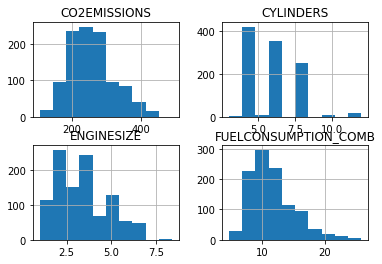

In [7]:
#Select some of the features
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

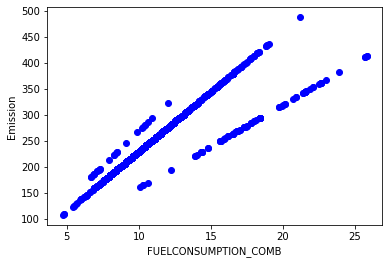

In [8]:
#Now, lets plot each of these features vs the Emission, to see how linear is their relation:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

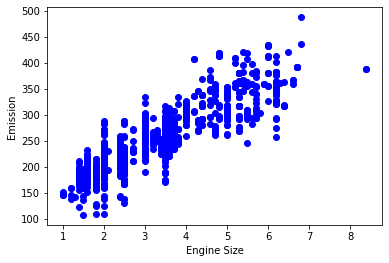

In [10]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

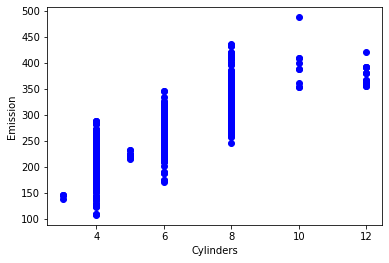

In [11]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


In [12]:
#Creating a new Dataframe inroder to include only selected features and we split the dataset using this new Dataframe
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [13]:
#Splitting the dataset into train and test
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.67451209]]
Intercept:  [123.69759336]


Text(0, 0.5, 'Emission')

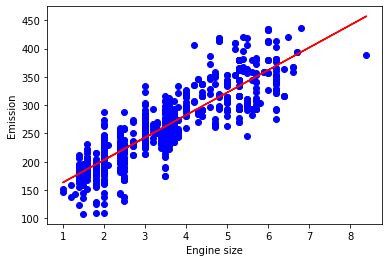

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predicted_test_y = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predicted_test_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_test_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(predicted_test_y , test_y) )

Mean absolute error: 23.86
Residual sum of squares (MSE): 975.35
R2-score: 0.69


In [18]:
predicted_test_y

array([[262.55838567],
       [262.55838567],
       [310.16780018],
       [203.04661754],
       [203.04661754],
       [203.04661754],
       [203.04661754],
       [373.64701952],
       [203.04661754],
       [242.72112963],
       [290.33054413],
       [242.72112963],
       [242.72112963],
       [242.72112963],
       [203.04661754],
       [203.04661754],
       [203.04661754],
       [242.72112963],
       [242.72112963],
       [203.04661754],
       [242.72112963],
       [298.26544655],
       [298.26544655],
       [242.72112963],
       [242.72112963],
       [298.26544655],
       [298.26544655],
       [242.72112963],
       [266.52583688],
       [203.04661754],
       [203.04661754],
       [222.88387358],
       [266.52583688],
       [266.52583688],
       [266.52583688],
       [266.52583688],
       [242.72112963],
       [369.67956831],
       [369.67956831],
       [266.52583688],
       [369.67956831],
       [179.24191029],
       [203.04661754],
       [333

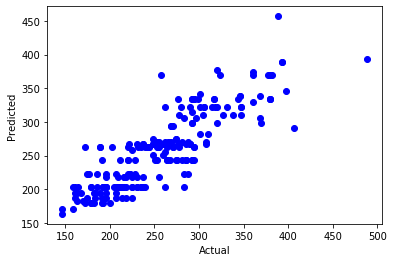

In [24]:
plt.scatter(test_y, predicted_test_y,  color='blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()